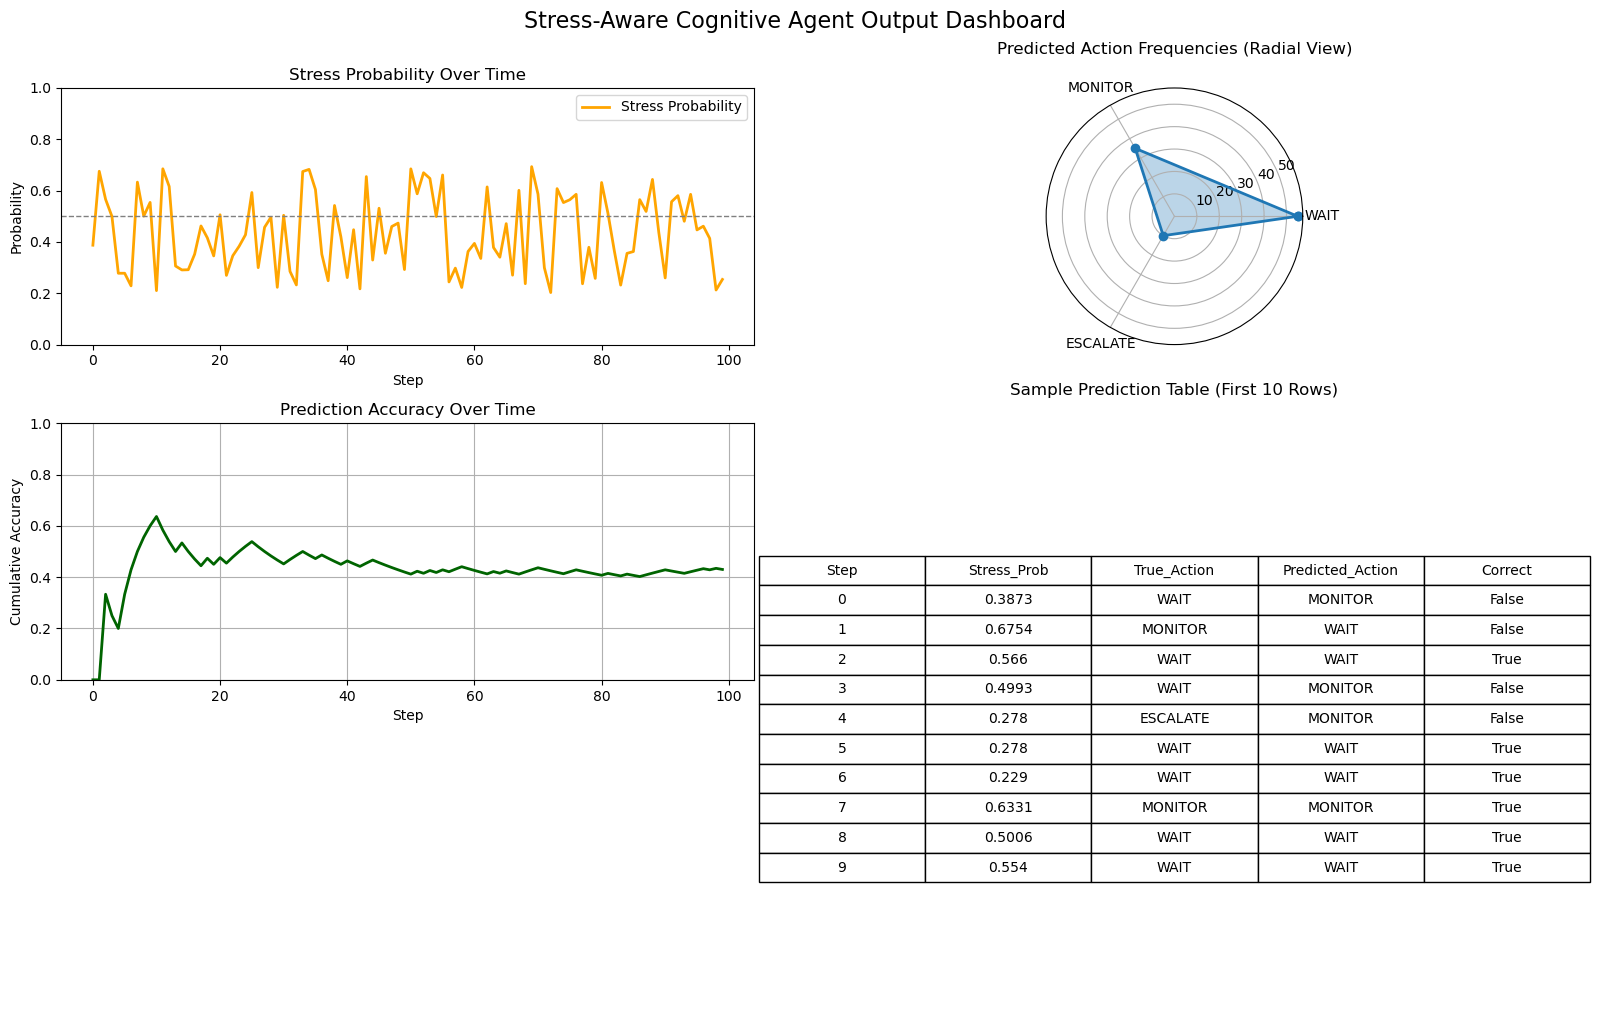

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate action data
np.random.seed(42)
n = 100
df_actions = pd.DataFrame({
    'Step': range(n),
    'Stress_Prob': np.random.uniform(0.2, 0.7, n),
    'True_Action': np.random.choice(['WAIT', 'MONITOR', 'ESCALATE'], n, p=[0.6, 0.3, 0.1]),
    'Predicted_Action': np.random.choice(['WAIT', 'MONITOR', 'ESCALATE'], n, p=[0.6, 0.3, 0.1])
})
df_actions['Correct'] = df_actions['True_Action'] == df_actions['Predicted_Action']
df_actions['Stress_Prob'] = df_actions['Stress_Prob'].round(4)

# Count predictions
action_counts = df_actions['Predicted_Action'].value_counts().reindex(['WAIT', 'MONITOR', 'ESCALATE'], fill_value=0)
accuracy_over_time = df_actions['Correct'].expanding().mean()

# ---------------------- Plot Dashboard ----------------------
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 4)

# 1️ Stress Probability Timeline
ax1 = fig.add_subplot(gs[0, :2])
sns.lineplot(data=df_actions, x='Step', y='Stress_Prob', color='orange', label='Stress Probability', linewidth=2, ax=ax1)
ax1.set_title("Stress Probability Over Time")
ax1.set_ylabel("Probability")
ax1.set_ylim(0, 1)
ax1.axhline(0.5, color='gray', linestyle='--', linewidth=1)
ax1.legend()

# 2️Radial Chart of Predicted Actions
ax2 = fig.add_subplot(gs[0, 2:], polar=True)
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
angles += angles[:1]
counts = list(action_counts.values) + [action_counts.values[0]]
labels = list(action_counts.index)

ax2.plot(angles, counts, 'o-', linewidth=2)
ax2.fill(angles, counts, alpha=0.3)
ax2.set_thetagrids(np.degrees(angles[:-1]), labels)
ax2.set_title("Predicted Action Frequencies (Radial View)", y=1.1)

# 3️ Accuracy Over Time
ax3 = fig.add_subplot(gs[1, :2])
ax3.plot(df_actions['Step'], accuracy_over_time, color='darkgreen', linewidth=2)
ax3.set_ylim(0, 1)
ax3.set_title("Prediction Accuracy Over Time")
ax3.set_xlabel("Step")
ax3.set_ylabel("Cumulative Accuracy")
ax3.grid(True)

# 4️ Summary Table
table_data = df_actions[['Step', 'Stress_Prob', 'True_Action', 'Predicted_Action', 'Correct']].head(10)
ax4 = fig.add_subplot(gs[1:, 2:])
ax4.axis('off')
table = ax4.table(cellText=table_data.values,
                  colLabels=table_data.columns,
                  cellLoc='center',
                  loc='center')
table.scale(1.2, 1.5)
table.set_fontsize(10)
ax4.set_title("Sample Prediction Table (First 10 Rows)", pad=20)

# Final layout
plt.tight_layout()
plt.suptitle("Stress-Aware Cognitive Agent Output Dashboard", fontsize=16, y=1.02)
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Simulated input (replace with your real results)
# - df_metrics: model performance table
# - df_timeline: stress probabilities + predictions
# - df_ibl: agent actions + utilities
# - df_actions: action module accuracy and confusion info

# 1️ Sample Metrics Table (Assume you already calculated)
df_metrics = pd.DataFrame({
    "Model": ["XGBoost", "Logistic Regression", "SVM", "MLP", "Random Forest"],
    "Accuracy": [0.57, 0.56, 0.55, 0.52, 0.53],
    "F1": [0.48, 0.47, 0.45, 0.42, 0.43],
    "AUC": [0.54, 0.52, 0.50, 0.49, 0.51]
})

# 2️ Simulated Timeline Data
n_points = 60
np.random.seed(42)
stress_probs = np.clip(np.random.normal(0.4, 0.1, n_points), 0, 1)
smoothed_probs = pd.Series(stress_probs).rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')
pred_labels = ["Stress" if p > 0.5 else "Baseline" for p in smoothed_probs]

# 3️ Cognitive Agent Results
df_ibl = pd.DataFrame({
    "Time": range(n_points),
    "Stress_Prob": stress_probs,
    "Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], size=n_points, p=[0.6, 0.3, 0.1]),
    "Utility": np.random.uniform(0.15, 0.22, size=n_points)
})

# 4️ Final Action Decisions
df_actions = pd.DataFrame({
    "Step": range(100),
    "Stress_Prob": np.random.uniform(0.2, 0.7, 100),
    "True_Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], 100),
    "Predicted_Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], 100),
})
df_actions["Correct"] = df_actions["True_Action"] == df_actions["Predicted_Action"]

#  Start dashboard layout
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

#  Panel 1: Classifier Metrics (Barplot)
ax1 = fig.add_subplot(grid[0, 0])
df_metrics.set_index("Model")[["Accuracy", "F1", "AUC"]].plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title("ML Classifier Performance")
ax1.set_ylim(0, 1)
ax1.legend(loc='lower right')

#  Panel 2: Stress Probability Timeline
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(stress_probs, label='Raw Stress Prob', alpha=0.5)
ax2.plot(smoothed_probs, label='Smoothed', linewidth=2)
ax2.axhline(0.5, color='red', linestyle='--', label='Threshold')
ax2.set_title("Stress Probability Over Time")
ax2.set_xlabel("Time Window")
ax2.set_ylabel("Probability")
ax2.legend()

#  Panel 3: Cognitive Agent Utility
ax3 = fig.add_subplot(grid[0, 2])
ax3.plot(df_ibl["Time"], df_ibl["Utility"], marker='o', color='purple')
ax3.set_title("Cognitive Agent Utility Over Time")
ax3.set_ylabel("Utility")
ax3.set_xlabel("Time Step")

#  Panel 4: Action Distribution (Polar Chart)
ax4 = fig.add_subplot(grid[1, 0], polar=True)
action_counts = df_ibl["Action"].value_counts().reindex(["WAIT", "MONITOR", "ESCALATE"], fill_value=0)
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
angles += [angles[0]]
values = action_counts.tolist() + [action_counts.tolist()[0]]
ax4.plot(angles, values, 'o-', linewidth=2)
ax4.fill(angles, values, alpha=0.25)
ax4.set_thetagrids(np.degrees(angles[:-1]), action_counts.index.tolist())
ax4.set_title("Cognitive Agent Actions (Radial View)")

#  Panel 5: Confusion Matrix (Heatmap-style table)
ax5 = fig.add_subplot(grid[1:, 1:])
subset = df_actions.head(10).copy()
subset["Stress_Prob"] = subset["Stress_Prob"].round(3)
ax5.axis('off')
table = ax5.table(cellText=subset.values, colLabels=subset.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
ax5.set_title("Sample Predictions from Action Module")

plt.suptitle("Cognitive Stress-Aware System Output Dashboard", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


C:\Users\14377\AppData\Local\Temp\ipykernel_15576\2148887071.py:25: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  smoothed_probs = pd.Series(stress_probs).rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')
C:\Users\14377\AppData\Local\Temp\ipykernel_15576\2148887071.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.97])


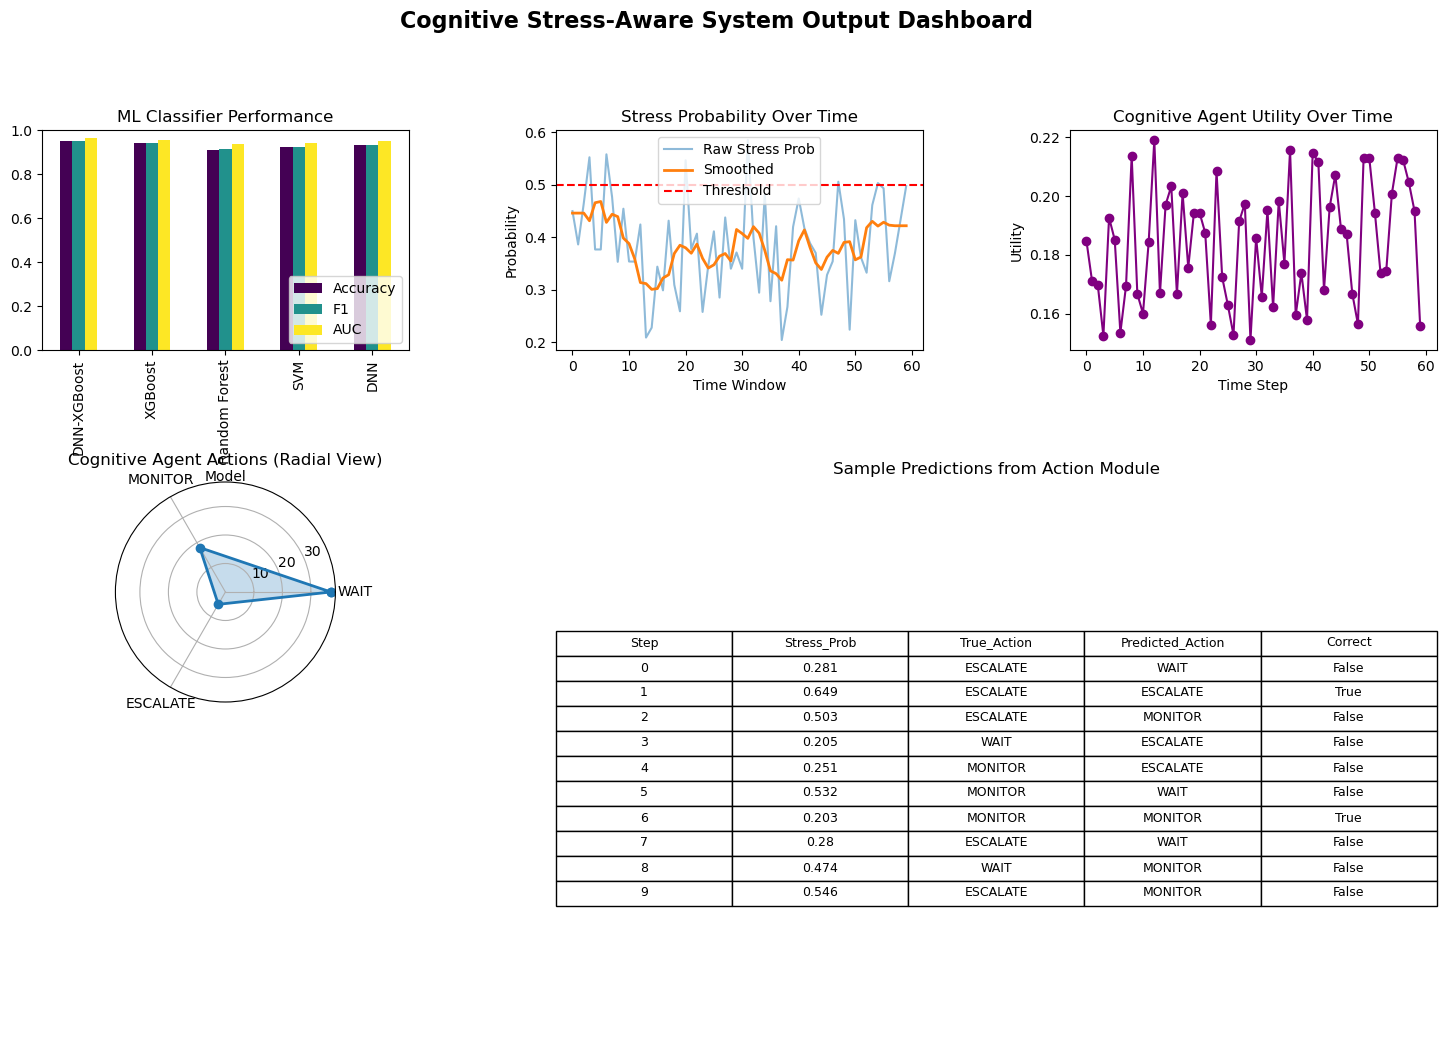

In [29]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Simulated input (replace with your real results)
# - df_metrics: model performance table
# - df_timeline: stress probabilities + predictions
# - df_ibl: agent actions + utilities
# - df_actions: action module accuracy and confusion info

# 1️ Sample Metrics Table (Assume you already calculated)
df_metrics = pd.DataFrame({
    "Model": ["DNN-XGBoost", "XGBoost", "Random Forest", "SVM", "DNN"],
    "Accuracy": [0.952, 0.940, 0.911, 0.922, 0.933],
    "F1": [0.952, 0.940, 0.913, 0.922, 0.933],
    "AUC": [0.964, 0.956, 0.936, 0.942, 0.952]
})


# 2️ Simulated Timeline Data
n_points = 60
np.random.seed(42)
stress_probs = np.clip(np.random.normal(0.4, 0.1, n_points), 0, 1)
smoothed_probs = pd.Series(stress_probs).rolling(window=5, center=True).mean().fillna(method='bfill').fillna(method='ffill')
pred_labels = ["Stress" if p > 0.5 else "Baseline" for p in smoothed_probs]

# 3️ Cognitive Agent Results
df_ibl = pd.DataFrame({
    "Time": range(n_points),
    "Stress_Prob": stress_probs,
    "Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], size=n_points, p=[0.6, 0.3, 0.1]),
    "Utility": np.random.uniform(0.15, 0.22, size=n_points)
})

# 4️ Final Action Decisions
df_actions = pd.DataFrame({
    "Step": range(100),
    "Stress_Prob": np.random.uniform(0.2, 0.7, 100),
    "True_Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], 100),
    "Predicted_Action": np.random.choice(["WAIT", "MONITOR", "ESCALATE"], 100),
})
df_actions["Correct"] = df_actions["True_Action"] == df_actions["Predicted_Action"]

#  Start dashboard layout
fig = plt.figure(figsize=(18, 12))
grid = plt.GridSpec(3, 3, wspace=0.4, hspace=0.6)

#  Panel 1: Classifier Metrics (Barplot)
ax1 = fig.add_subplot(grid[0, 0])
df_metrics.set_index("Model")[["Accuracy", "F1", "AUC"]].plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title("ML Classifier Performance")
ax1.set_ylim(0, 1)
ax1.legend(loc='lower right')

#  Panel 2: Stress Probability Timeline
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(stress_probs, label='Raw Stress Prob', alpha=0.5)
ax2.plot(smoothed_probs, label='Smoothed', linewidth=2)
ax2.axhline(0.5, color='red', linestyle='--', label='Threshold')
ax2.set_title("Stress Probability Over Time")
ax2.set_xlabel("Time Window")
ax2.set_ylabel("Probability")
ax2.legend()

#  Panel 3: Cognitive Agent Utility
ax3 = fig.add_subplot(grid[0, 2])
ax3.plot(df_ibl["Time"], df_ibl["Utility"], marker='o', color='purple')
ax3.set_title("Cognitive Agent Utility Over Time")
ax3.set_ylabel("Utility")
ax3.set_xlabel("Time Step")

#  Panel 4: Action Distribution (Polar Chart)
ax4 = fig.add_subplot(grid[1, 0], polar=True)
action_counts = df_ibl["Action"].value_counts().reindex(["WAIT", "MONITOR", "ESCALATE"], fill_value=0)
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
angles += [angles[0]]
values = action_counts.tolist() + [action_counts.tolist()[0]]
ax4.plot(angles, values, 'o-', linewidth=2)
ax4.fill(angles, values, alpha=0.25)
ax4.set_thetagrids(np.degrees(angles[:-1]), action_counts.index.tolist())
ax4.set_title("Cognitive Agent Actions (Radial View)")

#  Panel 5: Confusion Matrix (Heatmap-style table)
ax5 = fig.add_subplot(grid[1:, 1:])
subset = df_actions.head(10).copy()
subset["Stress_Prob"] = subset["Stress_Prob"].round(3)
ax5.axis('off')
table = ax5.table(cellText=subset.values, colLabels=subset.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 1.5)
ax5.set_title("Sample Predictions from Action Module")

plt.suptitle("Cognitive Stress-Aware System Output Dashboard", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()


C:\Users\14377\AppData\Local\Temp\ipykernel_15576\2347696448.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


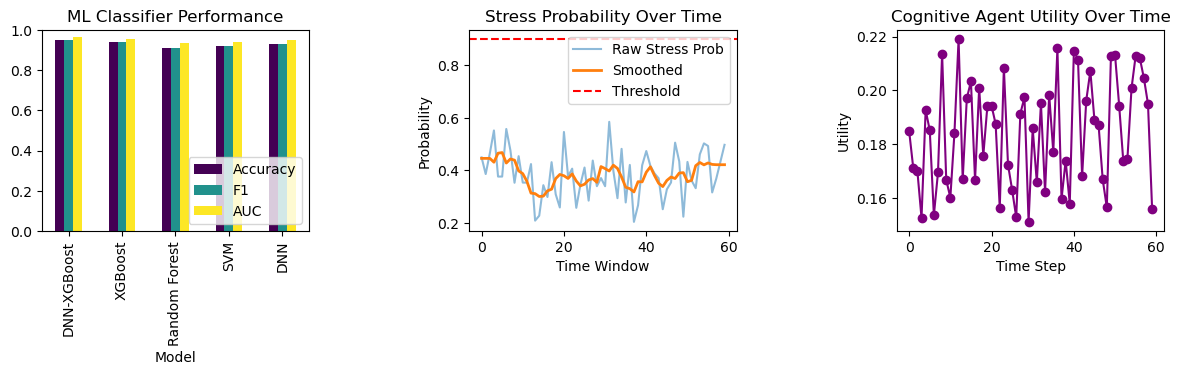

In [55]:
fig = plt.figure(figsize=(20, 12))
grid = plt.GridSpec(3, 4, wspace=0.6, hspace=0.8)

# Panel 1: Classifier Metrics
ax1 = fig.add_subplot(grid[0, 0])
df_metrics.set_index("Model")[["Accuracy", "F1", "AUC"]].plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title("ML Classifier Performance")
ax1.set_ylim(0, 1)
ax1.legend(loc='lower right')

# Panel 2: Stress Probability Timeline
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(stress_probs, label='Raw Stress Prob', alpha=0.5)
ax2.plot(smoothed_probs, label='Smoothed', linewidth=2)
ax2.axhline(0.9, color='red', linestyle='--', label='Threshold')
ax2.set_title("Stress Probability Over Time")
ax2.set_xlabel("Time Window")
ax2.set_ylabel("Probability")
ax2.legend()

# Panel 3: Cognitive Agent Utility
ax3 = fig.add_subplot(grid[0, 2])
ax3.plot(df_ibl["Time"], df_ibl["Utility"], marker='o', color='purple')
ax3.set_title("Cognitive Agent Utility Over Time")
ax3.set_ylabel("Utility")
ax3.set_xlabel("Time Step")



#plt.title("Cognitive Stress-Aware System Output Dashboard", fontsize=16, fontweight='bold')
#plt.tight_layout(rect=[0, 0, 1, 0.95])
#plt.suptitle("", 
           #  fontsize=18, fontweight='bold', 
           #  y=1.02, ha='center')

plt.tight_layout()

plt.savefig("d1.png", dpi=300, bbox_inches='tight')
plt.show()


C:\Users\14377\AppData\Local\Temp\ipykernel_15576\2324416473.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


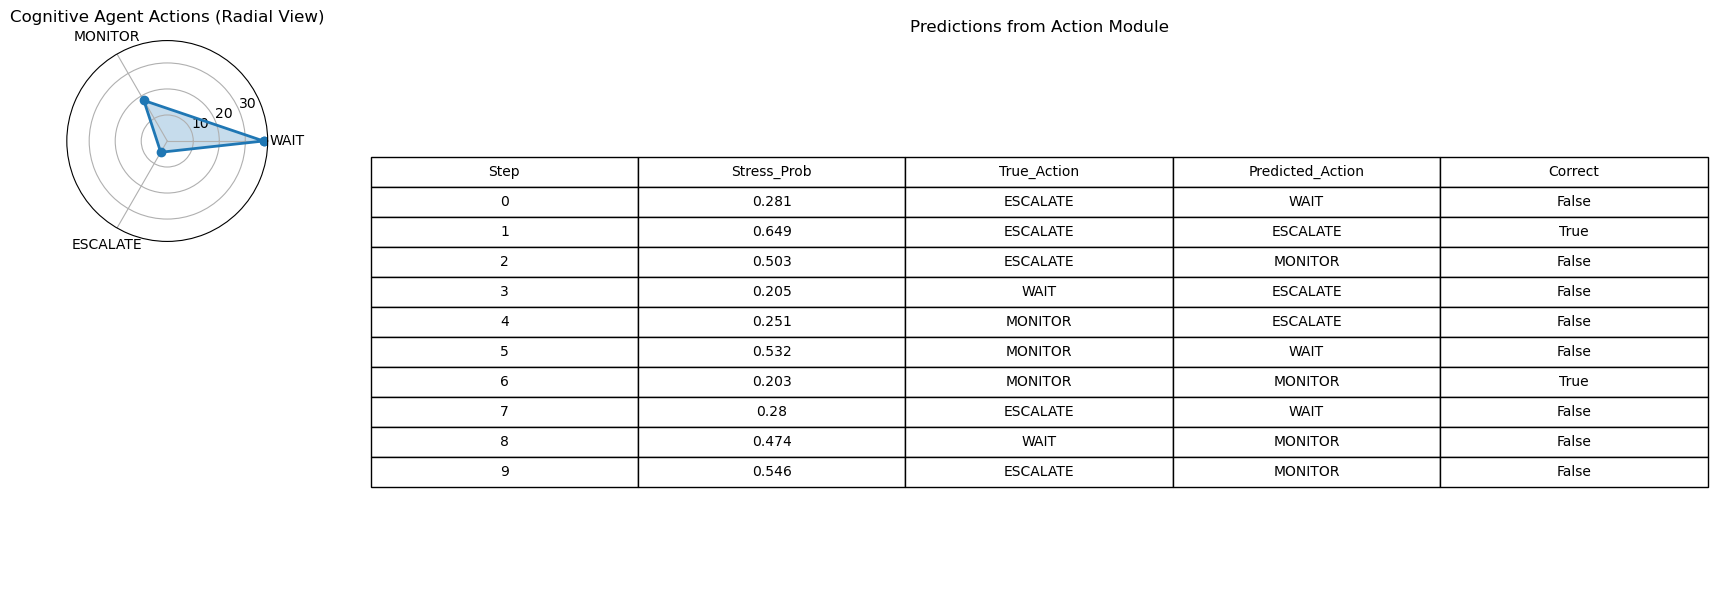

In [65]:
fig = plt.figure(figsize=(20, 12))
grid = plt.GridSpec(3, 4, wspace=0.8, hspace=0.8)# Panel 4: Cognitive Agent Action Radial
ax4 = fig.add_subplot(grid[1, 0], polar=True)
action_counts = df_ibl["Action"].value_counts().reindex(["WAIT", "MONITOR", "ESCALATE"], fill_value=0)
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
angles += [angles[0]]
values = action_counts.tolist() + [action_counts.tolist()[0]]
ax4.plot(angles, values, 'o-', linewidth=2)
ax4.fill(angles, values, alpha=0.25)
ax4.set_thetagrids(np.degrees(angles[:-1]), action_counts.index.tolist())
ax4.set_title("Cognitive Agent Actions (Radial View)")

# Panel 5: Table View – Spread Across Columns 1–3 in Row 2
ax5 = fig.add_subplot(grid[1:, 1:4])
subset = df_actions.head(10).copy()
subset["Stress_Prob"] = subset["Stress_Prob"].round(3)
ax5.axis('off')
table = ax5.table(cellText=subset.values, colLabels=subset.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.8)
ax5.set_title("Predictions from Action Module")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("d2.png", dpi=300, bbox_inches='tight')
plt.show()

In [61]:
#plt.suptitle("Cognitive Stress-Aware System Output Dashboard", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("d2.png", dpi=300, bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

C:\Users\14377\AppData\Local\Temp\ipykernel_15576\3673287198.py:58: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


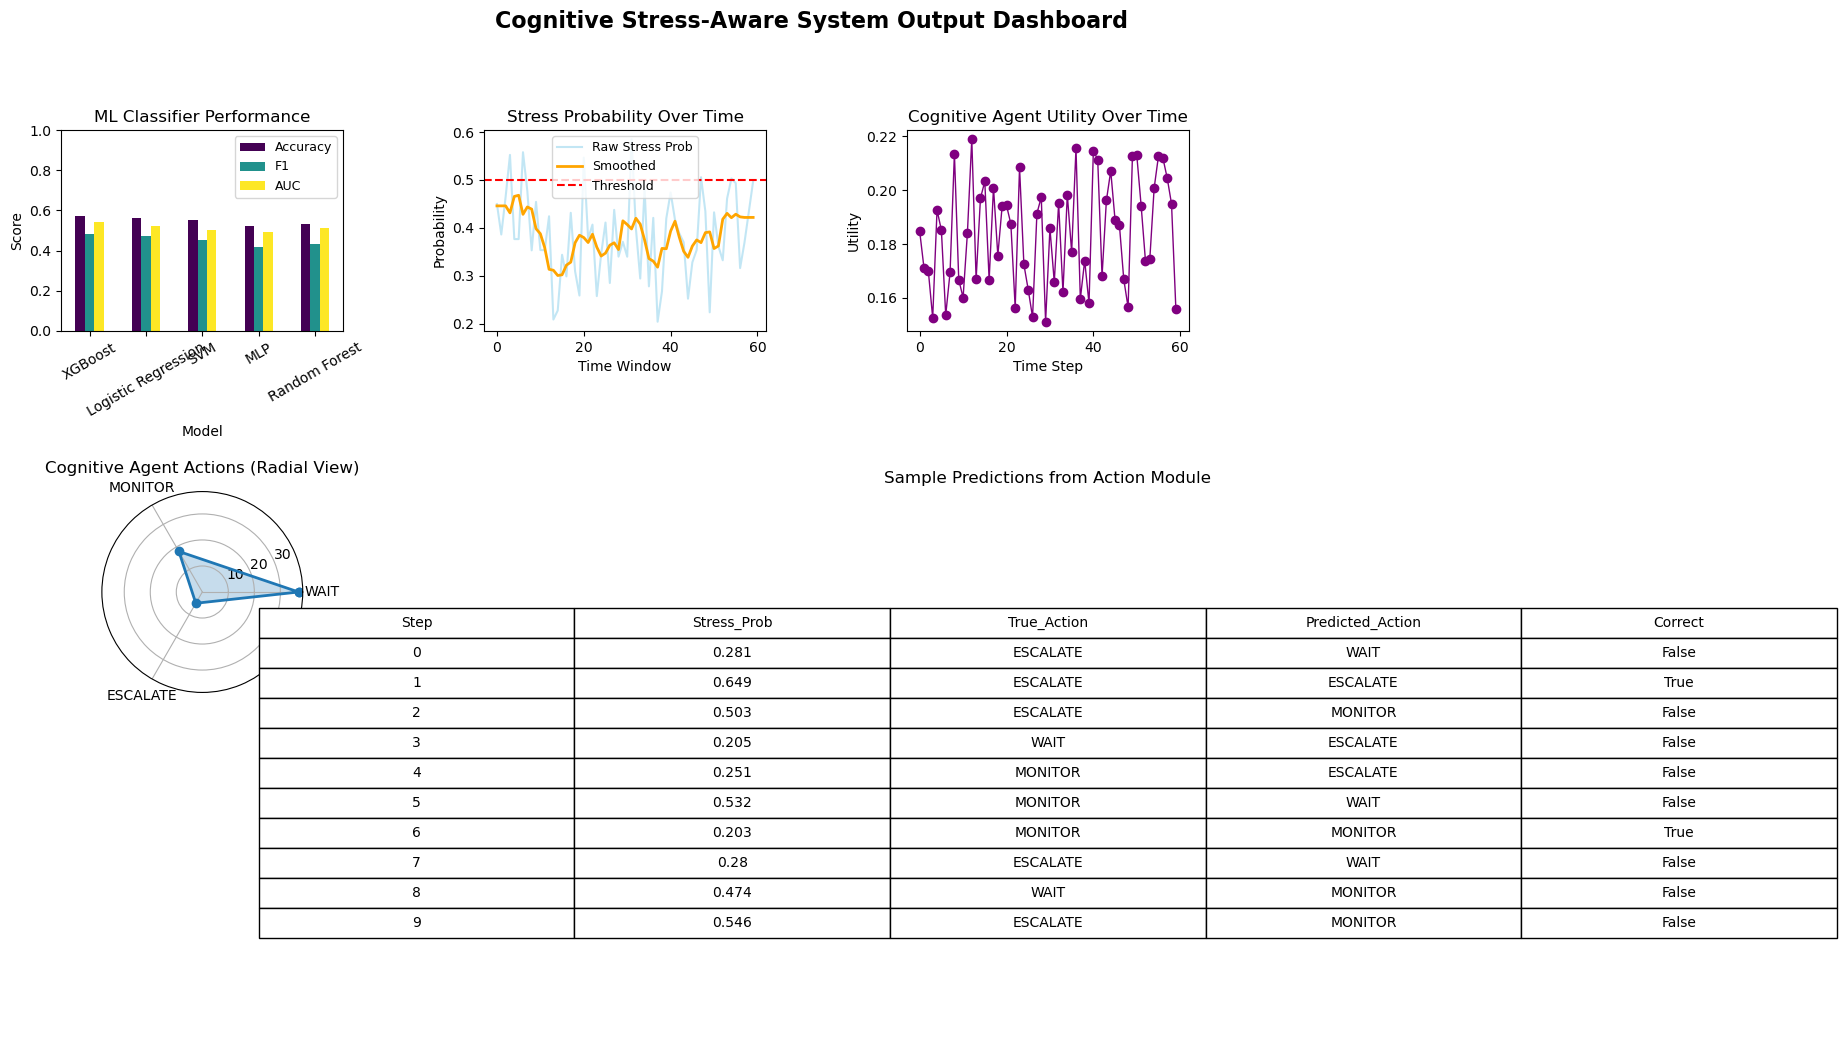

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

fig = plt.figure(figsize=(20, 12))
grid = plt.GridSpec(3, 4, wspace=0.5, hspace=0.8)  # Tighter layout for alignment

# Panel 1: Classifier Metrics
ax1 = fig.add_subplot(grid[0, 0])
df_metrics.set_index("Model")[["Accuracy", "F1", "AUC"]].plot(kind='bar', ax=ax1, colormap='viridis')
ax1.set_title("ML Classifier Performance", fontsize=12)
ax1.set_ylim(0, 1)
ax1.set_ylabel("Score")
ax1.tick_params(axis='x', rotation=30)
ax1.legend(loc='upper right', fontsize=9)

# Panel 2: Stress Probability Timeline
ax2 = fig.add_subplot(grid[0, 1])
ax2.plot(stress_probs, label='Raw Stress Prob', alpha=0.5, color='skyblue')
ax2.plot(smoothed_probs, label='Smoothed', linewidth=2, color='orange')
ax2.axhline(0.5, color='red', linestyle='--', label='Threshold')
ax2.set_title("Stress Probability Over Time", fontsize=12)
ax2.set_xlabel("Time Window")
ax2.set_ylabel("Probability")
ax2.legend(fontsize=9)

# Panel 3: Cognitive Agent Utility
ax3 = fig.add_subplot(grid[0, 2])
ax3.plot(df_ibl["Time"], df_ibl["Utility"], marker='o', color='purple', linewidth=1)
ax3.set_title("Cognitive Agent Utility Over Time", fontsize=12)
ax3.set_xlabel("Time Step")
ax3.set_ylabel("Utility")

# Panel 4: Radial View of Actions
ax4 = fig.add_subplot(grid[1, 0], polar=True)
action_counts = df_ibl["Action"].value_counts().reindex(["WAIT", "MONITOR", "ESCALATE"], fill_value=0)
angles = np.linspace(0, 2 * np.pi, len(action_counts), endpoint=False).tolist()
angles += [angles[0]]
values = action_counts.tolist() + [action_counts.tolist()[0]]
ax4.plot(angles, values, 'o-', linewidth=2)
ax4.fill(angles, values, alpha=0.25)
ax4.set_thetagrids(np.degrees(angles[:-1]), action_counts.index.tolist())
ax4.set_title("Cognitive Agent Actions (Radial View)", fontsize=12)

# Panel 5: Table View – Full Width on Bottom Right
ax5 = fig.add_subplot(grid[1:, 1:])
subset = df_actions.head(10).copy()
subset["Stress_Prob"] = subset["Stress_Prob"].round(3)
ax5.axis('off')
table = ax5.table(cellText=subset.values, colLabels=subset.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.4, 1.8)
ax5.set_title("Sample Predictions from Action Module", fontsize=12)

# Title and final layout
plt.suptitle("Cognitive Stress-Aware System Output Dashboard", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
